# Fashion-MNIST Classifier

4 fundamental steps:

1. Prepare data
2. Build the model
3. Train the model
4. Analyze the model's result

We start off with the first method of preparing the data using concept of ETL (Extract-Transform-Load)

In [4]:
# import relevant libraries
import torch   # top level package
import torchvision  # provides access to popular datasets and transformations
import torchvision.transforms as transforms   # interface which gives access to common image transformations
from torch.utils.data import DataLoader, Dataset, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2
torch.set_printoptions(linewidth=120)   # sets the line width for pytorch console

1. extract: Get the Fashion-MNIST image data
2. transform: Transform the data into tensor form
3. load: Put our data into object form which is easily accessible

For this PyTorch provides 2 classes, **Dataset** class and **Dataloader**.

## Dataset and Dataloaders with an example of custom dataset

**Dataset** is an abstract class for representing a dataset. An **abstract** class is a Python class that has methods which we must implement, so that we can create a custom dataset by creating a subclass.

In [5]:
class subclass(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __getitem__(self, index):
        sample = self.data[:,:-2]
        label = self.data[:,-1]
        return sample, label
    
    def __len__(self):
        return len(self.data)
    

An abstract class named subclass is implemented by inheriting the abstract class 
Dataset. The abstract class has __init__(), __getitem__() and __len__() functions.
These functions can be customized to load our custom dataset. 

## Dataset transformation

torchvision.datasets contains functions to create and transform a custom dataset or any of the inbuilt torch provided datasets.

In [6]:
train_set = torchvision.datasets.FashionMNIST(root="/home/nikunjlad/data/FashionMNIST",
                                             train=True, download=True,
                                             transform=transforms.Compose([transforms.ToTensor()]))

Let's explore the arguments:

1. root: the directory on disk to save the data
2. train: it tells us we want the training data
3. download: it tells the class to download the data
4. transform: we pass a composition of transformations. since we want tensor format, we have ToTensor() transformation

In [7]:
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/nikunjlad/data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

The train_set variable as seen above contains information on the dataset which we just extracted and transformed. I has various parameters and information into it which helps us gain more knowledge about this variable. Let's explore the various functionality provided by this dataset variable. You can access these functionality or additional metadata using **.(dot)** after the variable name as below:

In [8]:
# this maps class labels to integer indices
print(train_set.class_to_idx)
print("---------------------")
print(train_set.classes)   # print all the classes present in this dataset

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
---------------------
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
# contains the actual training data, we can also get shape as below.
# dont use test_data and train_data. instead use data. see warnings
train_set.data
print(train_set.train_data.shape)
print(train_set.test_data.shape)
print(train_set.data.shape)

torch.Size([60000, 28, 28])
torch.Size([60000, 28, 28])
torch.Size([60000, 28, 28])


/home/nikunjlad/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/nikunjlad/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [10]:
# gives download information of the dataset like number of datapoints, location of the data on disk, transformations applied, etc
print(train_set.download)
print("-----------------")
print(train_set.extra_repr)

<bound method MNIST.download of Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/nikunjlad/data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )>
-----------------
<bound method MNIST.extra_repr of Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/nikunjlad/data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )>


In [11]:
# location of the folder where processed amd raw images are stored in .pt format (pytorch format)
print(train_set.processed_folder)
print(train_set.raw_folder)

/home/nikunjlad/data/FashionMNIST/FashionMNIST/processed
/home/nikunjlad/data/FashionMNIST/FashionMNIST/raw


In [12]:
# gives the URLs from where the resource are fetched from. 
train_set.resources

[('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
  '8d4fb7e6c68d591d4c3dfef9ec88bf0d'),
 ('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
  '25c81989df183df01b3e8a0aad5dffbe'),
 ('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
  'bef4ecab320f06d8554ea6380940ec79'),
 ('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
  'bb300cfdad3c16e7a12a480ee83cd310')]

In [13]:
# root data directory where both the processed and raw data lie
train_set.root

'/home/nikunjlad/data/FashionMNIST'

In [14]:
# target corresponding to 60000 images in the dataset
# dont use test_labels and train_labels. instead use targets. see warnings
print(train_set.targets)
print(train_set.train_labels)
print(train_set.test_labels)

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])


/home/nikunjlad/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/nikunjlad/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [15]:
# name of the test file and training file
print(train_set.test_file)
print(train_set.training_file)

test.pt
training.pt


In [16]:
# is this training data?
train_set.train

True

In [17]:
# which kind of transformations did we apply on the data
print(train_set.transforms)
# both results are kind of similar
print(train_set.transform)

StandardTransform
Transform: Compose(
               ToTensor()
           )
Compose(
    ToTensor()
)


## Dataloader class and its properties

Dataloader is used to load the extracted and transformed data generated by Dataset class. This creates a dataloader object which is a form suitable for training, since data is batched, sampled, shuffled, etc here

In [18]:
train_loader = DataLoader(train_set)
train_loader

As we can see, once the dataset is loaded, we get a pytorch dataloader object. This object too has many options which gives various information about the dataloader object. Let's, explore them all

In [19]:
print(train_loader.batch_sampler.batch_size)  # returns default batch_size
print(train_loader.batch_size)   # use this preferably

1
1


In [20]:
# this is used when loading map-style of datasets. (need to explore iterable stype vs map style)
train_loader.collate_fn   

<function torch.utils.data._utils.collate.default_collate(batch)>

In [21]:
# information of the source from where data generated
print(train_loader.dataset)
print("--------------------")
print(train_loader.batch_sampler.sampler.data_source)   

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/nikunjlad/data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
--------------------
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/nikunjlad/data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [22]:
# drops the last incomplete batch of data. If say 100 data and batch size is 30, the last batch of 10 is dropped if True
print(train_loader.batch_sampler.drop_last)  # set to false, i.e no dropping 
print(train_loader.drop_last)  # use this preferably

False
False


In [23]:
# number of parallel processes to spawn for loading data. Usually configured to be equal to cores present on a machine
train_loader.num_workers

0

In [24]:
# if True, dataloaders will COPY tensors to CUDA pinned memory locations
train_loader.pin_memory

False

In [25]:
# timeout value for collecting batch of samples from workers
train_loader.timeout

0

In [26]:
# generally used with multi processing.
train_loader.worker_init_fn

We took a detour, so let's get back to loading the data using dataloaders

## Continuing with our data preparation...

In [27]:
train_set = torchvision.datasets.FashionMNIST(root="/home/nikunjlad/data/FashionMNIST",
                                             train=True, download=True,
                                             transform=transforms.Compose([transforms.ToTensor()]))
train_loader = DataLoader(train_set, batch_size=64)

In [28]:
len(train_set)   # no of training samples

60000

In [29]:
train_set.targets # labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [30]:
# how many samples are there in the 10 classes of Fashion-MNIST. We have
# balanced data of 6000 samples. If there is imbalance, then over sampling
# will help. This is done by repeating uncommon occurences of data and balance our dataset

# Oversampling is said to be the best method
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### OVER SAMPLING is best method of balancing imbalanced data

[arXiv publication](https://arxiv.org/abs/1710.05381) for oversampling

In [31]:
sample = next(iter(train_set))   # create an iterator of the training data

In [32]:
len(sample)   # get length of our sample. we have image-label pairs, hence 2

2

In [33]:
type(sample)   # create type of our sample

tuple

In [34]:
image, label = sample  # sequence unpacking (also called deconstruction of object)

**iter()** function creates an iterator object representing a **stream** of data. This object essentially holds a pointer and does not load all the data in memory. This pointer then iterates over all the data elements on invocation of **next()** function. This is analogous to the behaviour of how **generators** work in Python.

## Displaying some images to understand what our data contains

In [35]:
image.shape

torch.Size([1, 28, 28])

In [36]:
label

9

label 9


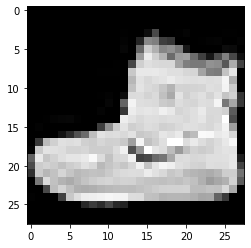

In [37]:
plt.imshow(image.squeeze(), cmap='gray')
print("label", label)

In [38]:
batch = next(iter(train_loader))

In [39]:
len(batch)  # batches still contain images and labels, but now a list instead of single image-label pair

2

In [40]:
type(batch)  # its a list, instead of a tuple

list

In [41]:
images, labels = batch   # we get first batch

In [42]:
images.shape   # rank 4 tensor of 64 gray scale images of shape 28x28

torch.Size([64, 1, 28, 28])

In [43]:
labels.shape   # rank 1 having 64 labels corresponding to above data

torch.Size([64])

Just like for training set which had data which could be accessed individually, the training dataloader has batches of data configured so that it can be accessed efficiently. This helps us in doing essentially the same thing as we did before but now on batches of data

labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


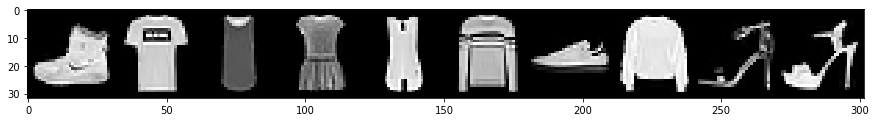

In [44]:
# of the 64 images in the batches, we select the first 10 and display it 
# in a grid using torchvision.utils make_grid() function
grid = torchvision.utils.make_grid(images[:10], nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print("labels", labels[:10])

## Building our Neural Network Model

We need to use, **torch.nn.Module** class. 

Class is like a blueprint, where people / things of similar nature / functionality exist. <br>
### Methods and Attributes
Objects are like the actual people / things which exist in a class. There can be multiple objects of a class, just like multiple students exist in a class. Those objects can perform all functions mentioned in the class. Simply put, all students can write, read and listen / understand to things taught in class. Yet each student reads / writes / listens in a different manner based on the inputs it receives or their own indifferences. When an object is created, we call it an **Instance** of a class. The Instance usually has 2 properties:<br>

1. **Methods** : represent the code or behavior of the object. For example, a student can run, sing, write, read, eat, etc. These things are behaviour methods of a class. 
2. **Attributes** : they represent the data of the object. They hold the data which is to be used by the methods. Inshort they help us know the objects (student's) characteristics. For example, gender (male/female), age, grade level, athlete (yes/no), etc. They define characteristics of the object.
<br><br>
Recall, that a class is a **BluePrint** of the object. It does not contain actual information, but is customizable based on user information. **Methods** are standalone and consistent across the class, but the **Attributes** are customizable parameters.

### Encapsulation
An object has it's own set of attributes and can access all the methods of the class. An object therefore holds both information of attributes and methods, since it can access both of them uniquely. This packaging of attributes and methods into a single class is called **Encapsulation**.

In [2]:
class Students:
    
    def __init__(self, name, height):
        self.name = name
        self.height = height
        
    def play(self):
        
        if self.height >= 6:
            print("{} can play basketball!".format(self.name))
        else:
            print("{} cannot play basketball".format(self.name))
    
s = Students("Jack", 5)
s.play()
s.name = "Mike"
s.height = 6
s.play()

Jack cannot play basketball
Mike can play basketball!


### Inheritance
PyTorch has an inbuilt neural network library which is named torch.nn<br>
There is a base class called **Module** which has all the functionality. i.e it has all the neural networks modules for constructing our model. This means all layers in PyTorch **extends** the nn.Module class. This concept of a class extending another class to gain access of it's attributes and methods is called **Inheritance**.
<br><br>
We inherit the **nn.Module** class to get all the functionality of the neural networks into our code. Inshort, if we imagine neural networks to be one large function, then layers are functions and our network is a **composition** of all those functions. Layers and networks are kind of similar in nature due to above analogy.

### Understanding forward propagation
A tensor passes through our network via each layer and undergoes transformation performed on it by each layer. This process of tensor flowing forward through the network is known as **forward pass** or **forward propagation**. Each layer has its own transformations and overall forward pass transformation of the network is the collection of all the transformations from these individual layers.<br>
<br>
Every **nn.Module** class has a **forward()** method which needs to be implemented in order to provide forward pass information. We need to implement the forward() method everytime we need to design our model.
<br><br>
When we implement the **forward()** function, we typically call the **nn.Functional** module. It provides packages for implementing our forward function.

In [45]:
class Net(nn.Module):  # inheriting the nn.Module class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    """
    Implementation of forward function takes in a tensor t and transforms it using the dummy layer.
    """
    def forward(self, t):
        t = self.layer(t)
        return t

The Module class is keeping track of the networks weights which are contained within each layer. 
<br>
Linear layers are also called **Dense** layers

In [46]:
# we get the network architecture here.
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

We get a good string representation of our network object above. This is because we have extended the nn.Module class which prints this. If we remove it, then we get just an object reference of the Net() class like below:

In [47]:
class Net():  # inheriting the nn.Module class
    def __init__(self):
#         super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    """
    Implementation of forward function takes in a tensor t and transforms it using the dummy layer.
    """
    def forward(self, t):
        t = self.layer(t)
        return t

## This is just used for illustration purposes. 
net = Net()
net

We use **__repr__** we can have a valuable message to be displayed when we print an object. Special OOP methods in python are called **Dunder methods**. They are called Dunder because of **Double Underscore**.
<br><br>
Stride helps us define how much do we need to shift the kernel to the right and below during convolution operation.

## Argument vs Parameters

Parameters are used inside function definition. They act as placeholders. They are like local variables.<br>
Arguments are actual values which are passed into the functions. Values comes from outside the function to inside. 
<br>
2 types of parameters enter the network:
1. hyperparameter
2. data dependent hyperparameters.
<br>
When we contruct a layer we pass parameters and values to the layers. For convolutional layers we have 3 parameters and for FC layers we have 2 parameters.
<br>

**Hyperparameters** values are chosen manually or arbitrarily. Manually choosing hyperparameters include **kernel_size**, **out_channels** and **out_features**, etc.
<br><br>
Data dependent hyperparameters include, **input channels** which is equal to depth of the image (either 1 or 3) and **output features** (i.e number of classes in the dataset)

## Filters vs Kernels

A kernel is a small nxn matrix which traverses over the image. They are usually odd numbered (preferably, like 3x3, 5x5, 7x7, etc) but can be even numbered too like 2x2 or 4x4.
<br><br>
A filter is basically a collection of kernels. 
<br><br>
**Output channels** are equal to **# of filters**. They are commonly known as **Feature Maps**. If we are dealing with linear layers we don't call them feature maps, since they are a rank 1 tensor

## Learnable parameters

Learnable parameters are parameters whose values are trained during training process. We typically start with an arbitrary set of values and they get updated iteratively as the network learns.
<br><br>
Our objective is to train the network so that it can **learn** the best set of these parameters in order to **minimize** the error it makes (i.e loss function)
<br><br>
These parameters are commonly called **weights**.

In [48]:
class Net(nn.Module):  # inheriting the nn.Module class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    """
    Implementation of forward function takes in a tensor t and transforms it using the dummy layer.
    """
    def forward(self, t):
        t = self.layer(t)
        return t
    
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [49]:
net.conv1

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [50]:
net.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [51]:
net.fc1

Linear(in_features=192, out_features=120, bias=True)

In [52]:
net.fc2

Linear(in_features=120, out_features=60, bias=True)

In [53]:
net.out

Linear(in_features=60, out_features=10, bias=True)

Just like the network object returns a string **representation(__repr__)** of the object, we can get individual layer informations as well using the **dot(.)** notation. Lets look at the initialized weights inside this functions

In [54]:
net.conv1.weight

Parameter containing:
tensor([[[[-0.0366, -0.0529, -0.0544, -0.1039, -0.0145],
          [ 0.0435, -0.0871,  0.0871, -0.0570,  0.0163],
          [ 0.0150, -0.0685, -0.0948,  0.0476,  0.0396],
          [ 0.1088, -0.0301, -0.0944, -0.0432, -0.0810],
          [-0.0584,  0.0457, -0.1038, -0.1140, -0.0893]],

         [[ 0.0818, -0.0213, -0.0510, -0.0255,  0.0568],
          [ 0.1064, -0.0088,  0.0519, -0.0760,  0.1115],
          [-0.0673,  0.0254, -0.0066, -0.0609, -0.1087],
          [-0.0852, -0.0207,  0.1143, -0.0391, -0.0437],
          [ 0.0175,  0.0110, -0.1077,  0.0396,  0.0775]],

         [[ 0.0657,  0.1002, -0.1006,  0.0329, -0.0757],
          [-0.0391,  0.0189,  0.0920,  0.0622, -0.0661],
          [-0.0503,  0.0649,  0.0443, -0.0931,  0.0922],
          [-0.0396, -0.1120, -0.0791,  0.0810, -0.0192],
          [ 0.0907,  0.1060, -0.0251,  0.0452, -0.1018]]],


        [[[-0.0610,  0.0050, -0.0174, -0.0181, -0.0592],
          [-0.0520, -0.0900,  0.1116, -0.0051,  0.1070],
 

Above output proves that each filter has different kernels. We can see, each filter has 3 kernels (each unique in nature) of size 5x5. They are randomly initialized. These 3 kernels together make up a filter. Since a filter has 3 kernels and there are 6 filters, we have total of 18 kernels. Since image is a color image, a filter has 3 kernels each corresponding to an RGB channel. If grayscale, then each filter will have only 1 kernel.

In [55]:
net.conv1.weight.shape

torch.Size([6, 3, 5, 5])

In [56]:
net.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [57]:
net.fc1.weight.shape

torch.Size([120, 192])

In [58]:
net.fc2.weight.shape

torch.Size([60, 120])

In [59]:
net.out.weight.shape

torch.Size([10, 60])

In [60]:
net.conv1.weight[0].shape

torch.Size([3, 5, 5])

Fully connected layers weight matrix called a linear map. It maps a higher dimensional space into lower dimension.